In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-cars-in-india-price-and-specifications/All_cars_dataset.csv


<div style="background:linear-gradient(90deg, #FFF3E0, #EDE7F6); padding:20px; border-radius:12px; text-align:center;">
<span style="color:#FF6B00; font-size:32px; font-weight:bold;">Indian Car Dataset Analysis</span><br>
<span style="color:#2C3E50; font-size:18px;">A complete exploratory analysis of Indian cars - uncovering pricing, mileage, and brand performance trends.</span><br>
</div>


![Indian Car Dataset Analysis](https://www.evolve-h2020.eu/image_temp/1200X628_1200X628_crop_e158717b10b7c79082e001d3c6fd4902.png)

## <span style="color:#FF6B00;  font-size: 30px">📘 Introduction</span>
<span style="color:#333333;">
This project explores the **Indian Car Dataset**, focusing on car pricing, fuel types, and brand analysis.  
We aim to identify key factors that influence price and mileage, while visualizing important trends across brands.
</span>

## <span style="color:#FF6B00;  font-size: 30px ">📂 Dataset Overview</span>
<span style="color:#333333;">
    
- **Source:** Kaggle (Indian Cars)  
    
- **Attributes:** Brand, Model, Price, Mileage, Fuel Type, Transmission, Seats, etc.
   
- **Goal:** Understand how various features affect car pricing and performance.
</span>


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Data_df = pd.read_csv(r"/kaggle/input/all-cars-in-india-price-and-specifications/All_cars_dataset.csv", encoding = "ISO-8859-1",low_memory=False)

print("✅ Dataset loaded successfully!")
print("Shape:", Data_df.shape)
print(Data_df.columns)

✅ Dataset loaded successfully!
Shape: (150, 23)
Index(['Name', 'EMI', 'Price', 'Mileage', 'ENGINE', 'TRANSMISSION',
       'FUEL TYPE', 'Price range', 'Length (mm)', 'Wheelbase (mm)',
       'Boot Space (L)', 'Width (mm)', 'Turning Radius (m)',
       'Fuel Capacity (L)', 'Height (mm)', 'Ground Clearance (mm)', 'Colors',
       'Seating Capacity', 'Displacement (cc)', 'Peak Power', 'Peak Torque',
       'Color Varients', 'Top_Speed'],
      dtype='object')


In [4]:
Data_df.head()

,Name,EMI,Price,Mileage,ENGINE,TRANSMISSION,FUEL TYPE,Price range,Length (mm),Wheelbase (mm),...,Fuel Capacity (L),Height (mm),Ground Clearance (mm),Colors,Seating Capacity,Displacement (cc),Peak Power,Peak Torque,Color Varients,Top_Speed
0,Porsche Macan,"1,18,950",69.98 Lakh,14 kmpl,1984 to 2995 cc,Automatic,Petrol,â¹ 69.98 - 85.01 Lakh,4696,2807,...,75,1624,198,"Agate Grey, Black, Carmine Red, Carrara White...",5,1984,251 BHP@5000 RPM,370 NM @1600 RPM,24,254 Km/h
1,Porsche 718,"1,45,262",85.46 Lakh,9 kmpl,1988 to 3995 cc,"Automatic, Manual",Petrol,â¹ 85.46 Lakh - 1.64 Crore,4379,2475,...,54,1281,128,"Agate Grey, Black, Carmine Red, Carrara White...",2,1988,295 BHP@6500 RPM,380 NM @1950 RPM,23,275km/h
2,Porsche Cayenne,"2,02,272",1.2 Crore,9 - 40 kmpl,2995 to 3996 cc,Automatic,Petrol,â¹ 1.2 - 1.93 Crore,4918,2895,...,75,1696,210,"Biscay Blue, Black, Carrara White, Jet Black ...",5,2995,456 BHP@5250 RPM,700 NM,22,286 Km/h
3,Porsche Cayenne Coupe,"2,24,165",1.32 Crore,10.75 kmpl,2995 to 3996 cc,Automatic,Petrol,â¹ 1.32 - 1.98 Crore,4931,2895,...,75,1676,190,"Biskay Blue , Carrara White, Crayon, Dolomite...",4,2995,335 BHP@5300 RPM,450 NM @1340 RPM,18,286 Km/h
4,Porsche Panamera,"2,45,599",1.44 Crore,8-37 kmpl,2894 to 4806 cc,Automatic,Petrol,â¹ 1.44 - 2.43 Crore,5049,2950,...,75,1423,133,"Amethyst, Aventurine Green, Burgundy Red, Car...",4,2894,326 BHP@5400 RPM,450 NM @1750 RPM,28,310 Km/h


In [5]:
Data_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   150 non-null    object
 1   EMI                    150 non-null    object
 2   Price                  150 non-null    object
 3   Mileage                150 non-null    object
 4   ENGINE                 144 non-null    object
 5   TRANSMISSION           150 non-null    object
 6   FUEL TYPE              150 non-null    object
 7   Price range            150 non-null    object
 8   Length (mm)            150 non-null    int64 
 9   Wheelbase (mm)         150 non-null    object
 10  Boot Space (L)         150 non-null    object
 11  Width (mm)             150 non-null    int64 
 12  Turning Radius (m)     150 non-null    object
 13  Fuel Capacity (L)      150 non-null    object
 14  Height (mm)            150 non-null    int64 
 15  Ground Clearance (mm)  

## <span style="color:#FF6B00;  font-size: 30px">🧹 Data Cleaning</span>
<span style="color:#333333;">
    
✅ Removed missing values  

✅ Renamed inconsistent columns  

✅ Removed duplicate rows  

✅ Handled outliers (using IQR method) 

✅ Converted price & mileage columns to numeric formats  </span>

In [6]:
def clean_price(value):
    """Convert '₹ 9.8 Lakh' → 980000.0"""
    if pd.isna(value):
        return np.nan
    value = str(value)
    value = value.replace("₹", "").replace(",", "").replace("Rs", "").replace("Lakh", "").strip()
    try:
        return float(value) * 100000
    except:
        return np.nan

In [7]:
def clean_range_value(value):
    """Convert '9 - 40' → 24.5 or '18.2 kmpl' → 18.2"""
    if pd.isna(value):
        return np.nan
    value = str(value).strip()
    value = re.sub(r"[^\d\.\-]", "", value)
    if '-' in value:
        parts = value.split('-')
        try:
            nums = [float(p) for p in parts if p.strip() != ""]
            return np.mean(nums)
        except:
            return np.nan
    else:
        try:
            return float(value)
        except:
            return np.nan

In [8]:
def clean_numeric(value, unit):
    """Remove a given unit (like 'cc', 'mm', etc.)"""
    if pd.isna(value):
        return np.nan
    value = str(value).replace(unit, "").strip()
    try:
        return float(value)
    except:
        return np.nan

<span style="color:#F1C40F; font-size:18px;">→ Clean Price</span>

In [9]:
if "Price" in Data_df.columns:
    Data_df["Price"] = Data_df["Price"].apply(clean_price)

<span style="color:#F1C40F; font-size:18px;">→ Clean Mileage</span>

In [10]:

if "Mileage" in Data_df.columns:
    Data_df["Mileage"] = Data_df["Mileage"].apply(clean_range_value)

<span style="color:#F1C40F; font-size:18px;">→  Clean Engine</span>

In [11]:
if "ENGINE" in Data_df.columns:
    Data_df["ENGINE"] = Data_df["ENGINE"].apply(lambda x: clean_numeric(x, "cc"))

<span style="color:#F1C40F; font-size:18px;">→ Clean Top Speed</span>

</div>

In [12]:
if "Top_Speed" in Data_df.columns:
    Data_df["Top_Speed"] = Data_df["Top_Speed"].apply(clean_range_value)


<span style="color:#F1C40F; font-size:18px;">→ Clean Fuel Capacity</span>

In [13]:
if "Fuel Capacity (L)" in Data_df.columns:
    Data_df["Fuel Capacity (L)"] = Data_df["Fuel Capacity (L)"].apply(lambda x: clean_numeric(x, "L"))


<span style="color:#F1C40F; font-size:18px;">→ Clean Seating Capacity</span>

In [14]:
if "Seating Capacity" in Data_df.columns:
    Data_df["Seating Capacity"] = pd.to_numeric(Data_df["Seating Capacity"], errors="coerce")


<span style="color:#F1C40F; font-size:18px;">→ Handle missing values</span>

In [15]:
# Fill missing Engine with median
if "ENGINE" in Data_df.columns:
    Data_df["ENGINE"].fillna(Data_df["ENGINE"].median(), inplace=True)

In [16]:
# Fill Mileage missing with median
if "Mileage" in Data_df.columns:
    Data_df["Mileage"].fillna(Data_df["Mileage"].median(), inplace=True)

In [17]:
# Drop rows with missing Price
Data_df.dropna(subset=["Price"], inplace=True)

In [18]:
print("\n✅ Missing values handled successfully!")
print(Data_df.isnull().sum().sort_values(ascending=False).head(10))


✅ Missing values handled successfully!
Fuel Capacity (L)        9
Seating Capacity         2
Name                     0
Turning Radius (m)       0
Color Varients           0
Peak Torque              0
Peak Power               0
Displacement (cc)        0
Colors                   0
Ground Clearance (mm)    0
dtype: int64


In [19]:
print("\nDataset Summary:\n")
print(Data_df.describe())


Dataset Summary:

              Price     Mileage       ENGINE  Length (mm)   Width (mm)  \
count  1.090000e+02  109.000000   109.000000   109.000000   109.000000   
mean   3.581202e+06   26.906697  1932.853211  4453.688073  1831.339450   
std    2.922391e+06   59.867036   415.535572   414.311448   112.961745   
min    3.180000e+05    7.000000   999.000000  3435.000000  1574.000000   
25%    9.140000e+05   14.000000  1969.000000  3995.000000  1755.000000   
50%    2.990000e+06   16.000000  1998.000000  4500.000000  1822.000000   
75%    5.820000e+06   19.000000  1998.000000  4761.000000  1890.000000   
max    9.990000e+06  452.000000  2998.000000  5151.000000  2170.000000   

       Fuel Capacity (L)  Height (mm)  Seating Capacity  Color Varients  \
count         100.000000   109.000000        107.000000      109.000000   
mean           55.000000  1591.642202          5.205607       15.376147   
std            15.058807   146.383345          0.988026        8.795821   
min           

## <span style="color:#FF6B00; font-size:30px;">📈 Outlier Treatment</span>
<span style="color:#333333;">
    
Outliers were detected using boxplots and treated via the **IQR method**.  
    
Extreme values in `Price` and `Mileage` were capped to maintain data integrity.
</span>

In [20]:
Data_df.to_csv("All_cars_dataset_cleaned.csv", index=False)
print("\n🎉 Cleaned dataset saved as 'All_cars_dataset_cleaned.csv'")
print("Final shape:", Data_df.shape)


🎉 Cleaned dataset saved as 'All_cars_dataset_cleaned.csv'
Final shape: (109, 23)


In [21]:

# Load the cleaned dataset
df = pd.read_csv("All_cars_dataset_cleaned.csv")

# Select numeric columns for analysis
n_columns = ['Price', 'Mileage', 'Top_Speed']

print("✅ Numeric columns selected:", n_columns)


✅ Numeric columns selected: ['Price', 'Mileage', 'Top_Speed']


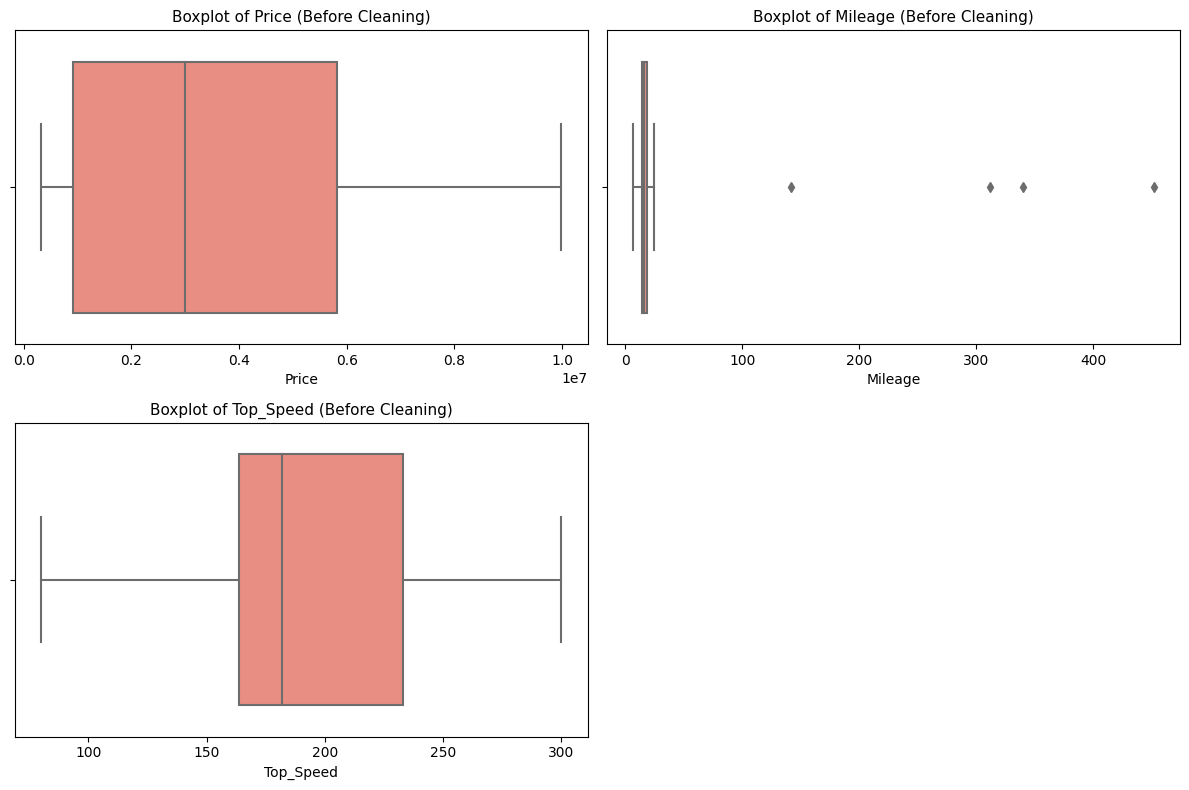

In [22]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(n_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col} (Before Cleaning)', fontsize=11)
plt.tight_layout()
plt.show()


In [23]:
# Calculate IQR for each numeric column
Q1 = df[n_columns].quantile(0.25)
Q3 = df[n_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify number of outliers in each column
outlier_count = ((df[n_columns] < lower_bound) | (df[n_columns] > upper_bound)).sum()
print("🔍 Number of outliers in each column:\n", outlier_count)


🔍 Number of outliers in each column:
 Price        0
Mileage      4
Top_Speed    0
dtype: int64


In [24]:
# Function to remove outliers column-wise
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Apply the function to numeric columns
df_clean = df.copy()
for col in n_columns:
    before = df_clean.shape[0]
    df_clean = remove_outliers_iqr(df_clean, col)
    after = df_clean.shape[0]
    print(f"✅ {col}: removed {before - after} outliers")

print("\n🎯 Final shape after removing outliers:", df_clean.shape)


✅ Price: removed 0 outliers
✅ Mileage: removed 4 outliers
✅ Top_Speed: removed 0 outliers

🎯 Final shape after removing outliers: (105, 23)


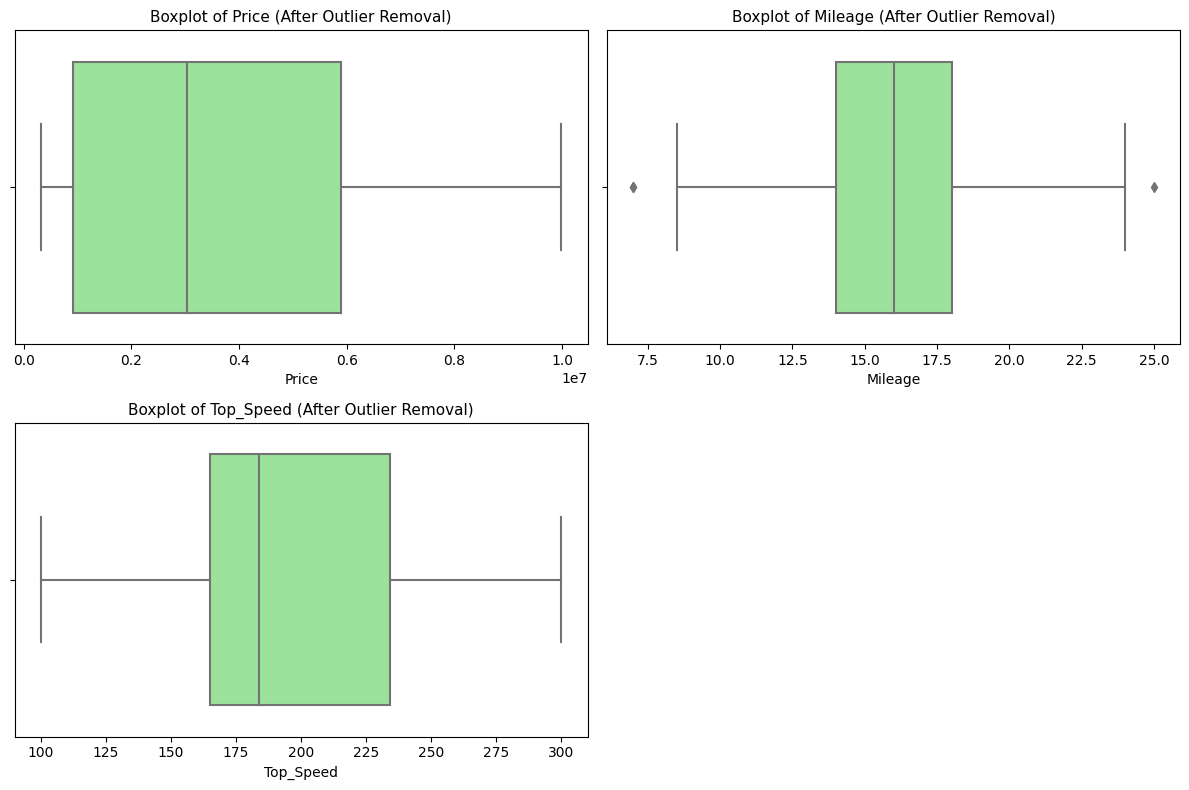

In [25]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(n_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_clean[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (After Outlier Removal)', fontsize=11)
plt.tight_layout()
plt.show()



## ✅ Interpretation:

- The boxplots should now look more compact and smooth.

- Extreme data points (very high or low values) have been removed.

## <span style="color:#FF6B00; font-size:30px;">📊 Exploratory Data Analysis</span>

<span style="color:#333333;">
The dataset was visualized to understand patterns and relationships between features:
</span>

- <span style="color:#F1C40F;">**Price Distribution:**</span> Shows how car prices are spread across segments.  
- <span style="color:#F1C40F;">**Brand Analysis:**</span> Identifies top brands with high-value cars.  
- <span style="color:#F1C40F;">**Fuel Type Breakdown:**</span> Compares fuel type preferences (Petrol vs Diesel vs Electric).  
- <span style="color:#F1C40F;">**Mileage vs Price:**</span> Highlights efficiency trends.  


In [26]:
df = pd.read_csv("All_cars_dataset_cleaned.csv")
print("✅ Data loaded successfully!")
print(df.shape)
df.head()

✅ Data loaded successfully!
(109, 23)


,Name,EMI,Price,Mileage,ENGINE,TRANSMISSION,FUEL TYPE,Price range,Length (mm),Wheelbase (mm),...,Fuel Capacity (L),Height (mm),Ground Clearance (mm),Colors,Seating Capacity,Displacement (cc),Peak Power,Peak Torque,Color Varients,Top_Speed
0,Porsche Macan,"1,18,950",6998000.0,14.0,1998.0,Automatic,Petrol,â¹ 69.98 - 85.01 Lakh,4696,2807,...,75.0,1624,198,"Agate Grey, Black, Carmine Red, Carrara White...",5.0,1984,251 BHP@5000 RPM,370 NM @1600 RPM,24,254.0
1,Porsche 718,"1,45,262",8546000.0,9.0,1998.0,"Automatic, Manual",Petrol,â¹ 85.46 Lakh - 1.64 Crore,4379,2475,...,54.0,1281,128,"Agate Grey, Black, Carmine Red, Carrara White...",2.0,1988,295 BHP@6500 RPM,380 NM @1950 RPM,23,275.0
2,Audi Q2,"59,475",3499000.0,15.0,1984.0,Automatic,Petrol,â¹ 34.99 - 48.89 Lakh,4318,2593,...,55.0,1548,200,"Arabian Blue Crystal, Daytona Gray Pearl Effe...",5.0,1984,187 BHP@4200 RPM,320 NM @1500 RPM,19,228.0
3,Audi A4,"71,968",4234000.0,12.3,1984.0,Automatic,Petrol,â¹ 42.34 - 46.67 Lakh,4762,2819,...,54.0,1433,160,"Floret Silver, Ibis White, Mythos Black, Nava...",5.0,1984,188 BHP@4200 RPM,320 NM @1450 RPM,10,241.0
4,Audi A6,"85,006",5586000.0,14.0,1984.0,Automatic,Petrol,â¹ 55.86 - 60.51 Lakh,4939,2924,...,73.0,1457,165,"Firmament Blue, Ibis White, Mysthos Black, Se...",5.0,1984,241 BHP@5000 RPM,370 NM @1600 RPM,10,250.0


In [27]:
print("\n🔹 Basic Info:")
print(df.info())


🔹 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   109 non-null    object 
 1   EMI                    109 non-null    object 
 2   Price                  109 non-null    float64
 3   Mileage                109 non-null    float64
 4   ENGINE                 109 non-null    float64
 5   TRANSMISSION           109 non-null    object 
 6   FUEL TYPE              109 non-null    object 
 7   Price range            109 non-null    object 
 8   Length (mm)            109 non-null    int64  
 9   Wheelbase (mm)         109 non-null    object 
 10  Boot Space (L)         109 non-null    object 
 11  Width (mm)             109 non-null    int64  
 12  Turning Radius (m)     109 non-null    object 
 13  Fuel Capacity (L)      100 non-null    float64
 14  Height (mm)            109 non-null    int6

In [28]:

print("\n🔹 Missing Values:")
print(df.isnull().sum())



🔹 Missing Values:
Name                     0
EMI                      0
Price                    0
Mileage                  0
ENGINE                   0
TRANSMISSION             0
FUEL TYPE                0
Price range              0
Length (mm)              0
Wheelbase (mm)           0
Boot Space (L)           0
Width (mm)               0
Turning Radius (m)       0
Fuel Capacity (L)        9
Height (mm)              0
Ground Clearance (mm)    0
Colors                   0
Seating Capacity         2
Displacement (cc)        0
Peak Power               0
Peak Torque              0
Color Varients           0
Top_Speed                0
dtype: int64


In [29]:
print("\n🔹 Statistical Summary:")
print(df.describe())


🔹 Statistical Summary:
              Price     Mileage       ENGINE  Length (mm)   Width (mm)  \
count  1.090000e+02  109.000000   109.000000   109.000000   109.000000   
mean   3.581202e+06   26.906697  1932.853211  4453.688073  1831.339450   
std    2.922391e+06   59.867036   415.535572   414.311448   112.961745   
min    3.180000e+05    7.000000   999.000000  3435.000000  1574.000000   
25%    9.140000e+05   14.000000  1969.000000  3995.000000  1755.000000   
50%    2.990000e+06   16.000000  1998.000000  4500.000000  1822.000000   
75%    5.820000e+06   19.000000  1998.000000  4761.000000  1890.000000   
max    9.990000e+06  452.000000  2998.000000  5151.000000  2170.000000   

       Fuel Capacity (L)  Height (mm)  Seating Capacity  Color Varients  \
count         100.000000   109.000000        107.000000      109.000000   
mean           55.000000  1591.642202          5.205607       15.376147   
std            15.058807   146.383345          0.988026        8.795821   
min      

<span style="color:#F1C40F; font-size:28px;">→ Distribution of Numeric Columns</span>

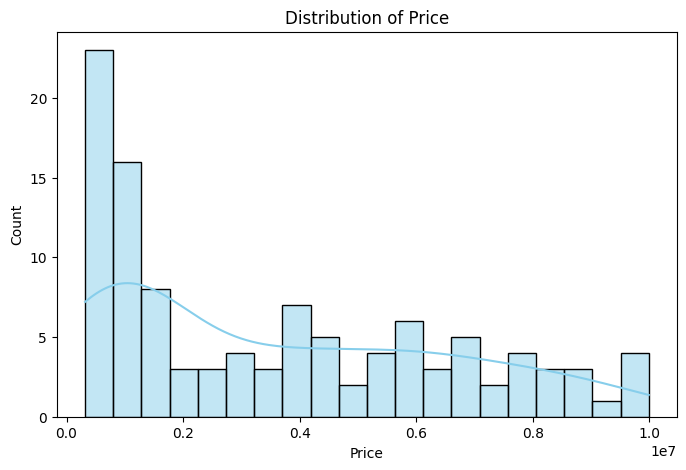

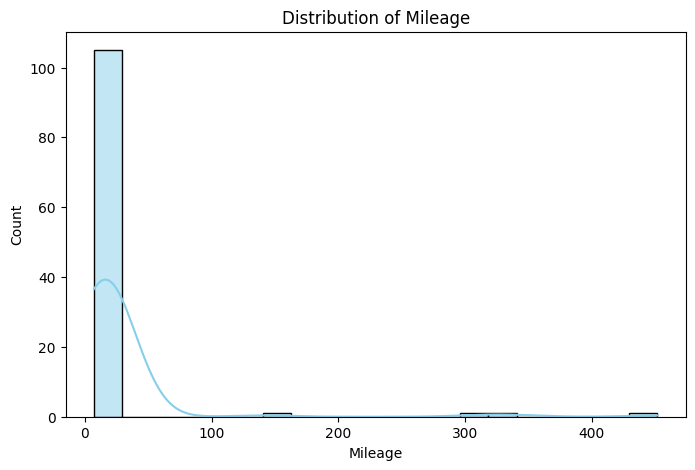

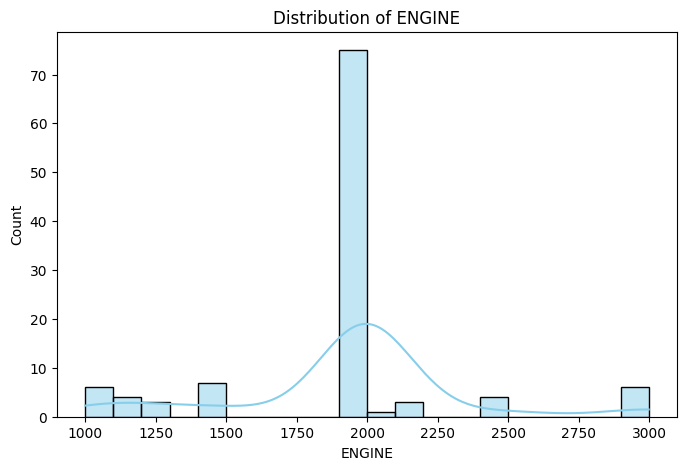

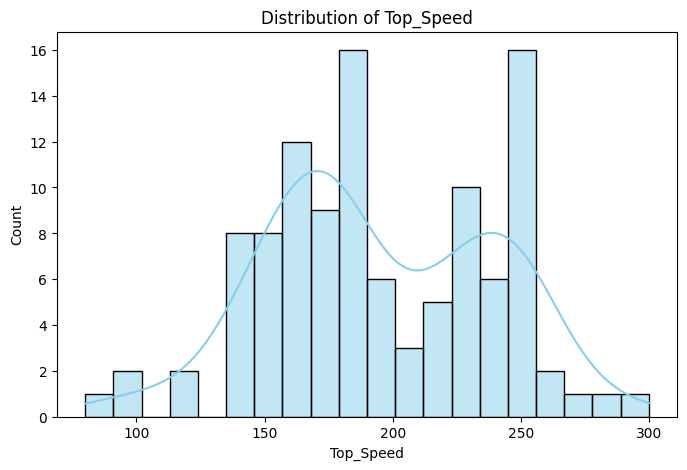

In [30]:
n_columns = ["Price", "Mileage", "ENGINE", "Top_Speed"]

for col in n_columns:
    if col in df.columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], kde=True, bins=20, color="skyblue")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()



## <span style="color:#8E44AD; font-size:30px;">💡 Insights</span>

<span style="color:#F1C40F;">✔️ See how price, engine size, or mileage are distributed.</span>  
<span style="color:#F1C40F;">✔️ Skewed distributions hint at premium or budget car clusters.</span> 


<span style="color:#F1C40F; font-size:28px;">→ Correlation Heatmaps</span>

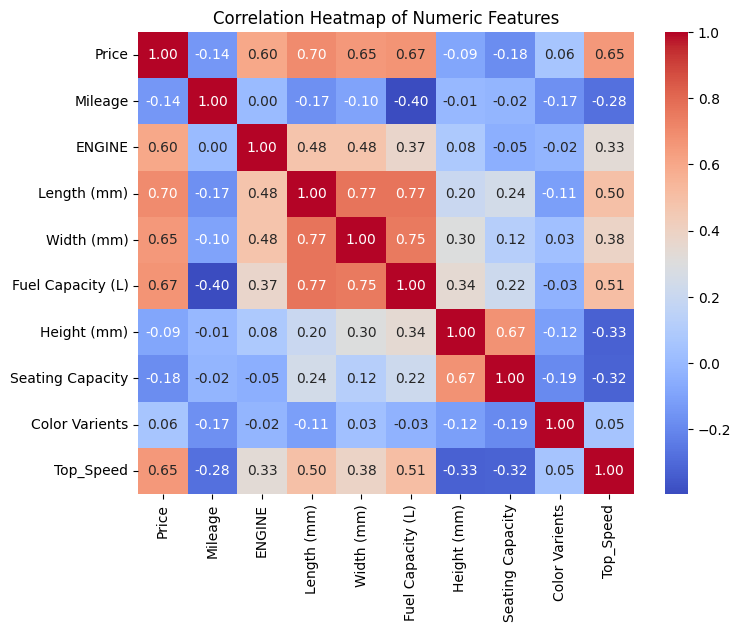

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()



## <span style="color:#8E44AD; font-size:30px;">💡 Insights</span>

<span style="color:#F1C40F;">✔️ Helps identify relationships between variables — e.g., does higher engine size increase price?</span>  



<span style="color:#F1C40F; font-size:28px;">→ Price vs Fuel Types</span>

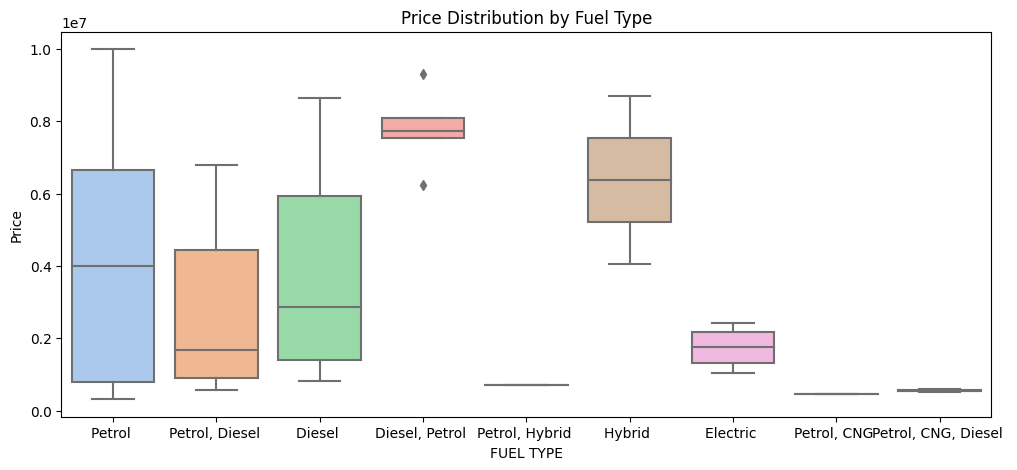

In [32]:
if "FUEL TYPE" in df.columns:
    plt.figure(figsize=(12,5))
    sns.boxplot(x="FUEL TYPE", y="Price", data=df, palette="pastel")
    plt.title("Price Distribution by Fuel Type")
    plt.show()



## <span style="color:#8E44AD; font-size:30px;">💡 Insights</span>

<span style="color:#F1C40F;">✔️ Compare petrol vs diesel vs electric cars in terms of price.</span> 

<span style="color:#F1C40F; font-size:28px;">→ Transmission Type vs Price</span>

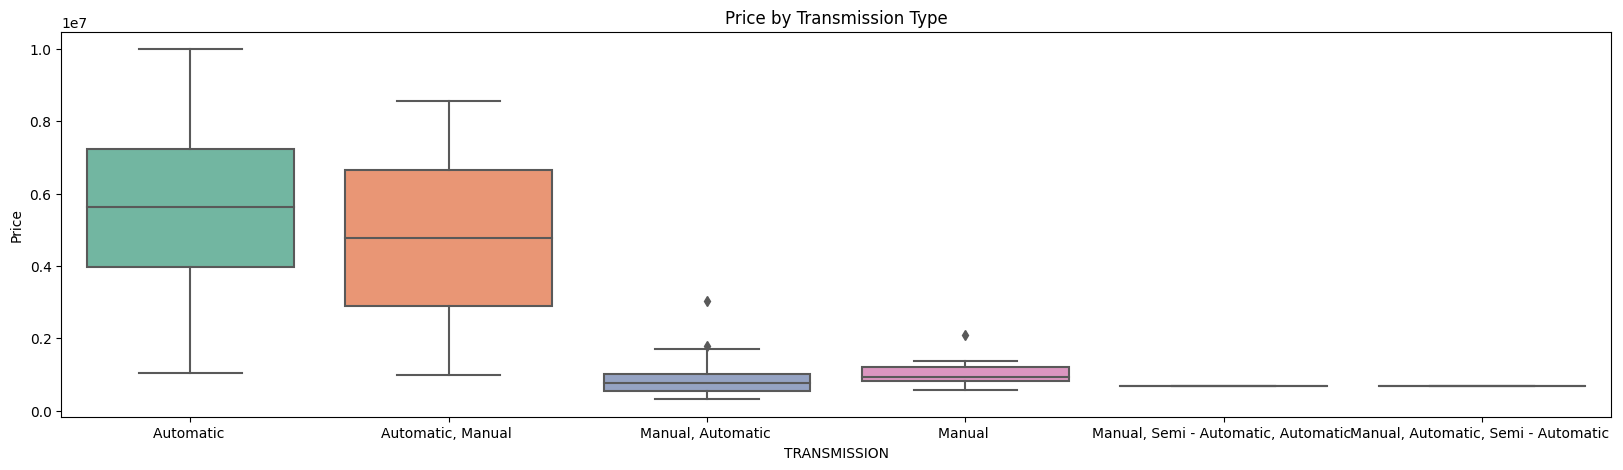

In [33]:
if "TRANSMISSION" in df.columns:
    plt.figure(figsize=(20,5))
    sns.boxplot(x="TRANSMISSION", y="Price", data=df, palette="Set2")
    plt.title("Price by Transmission Type")
    plt.show()


<span style="color:#F1C40F; font-size:28px;">→ Engine vs Mileage Relationships</span>

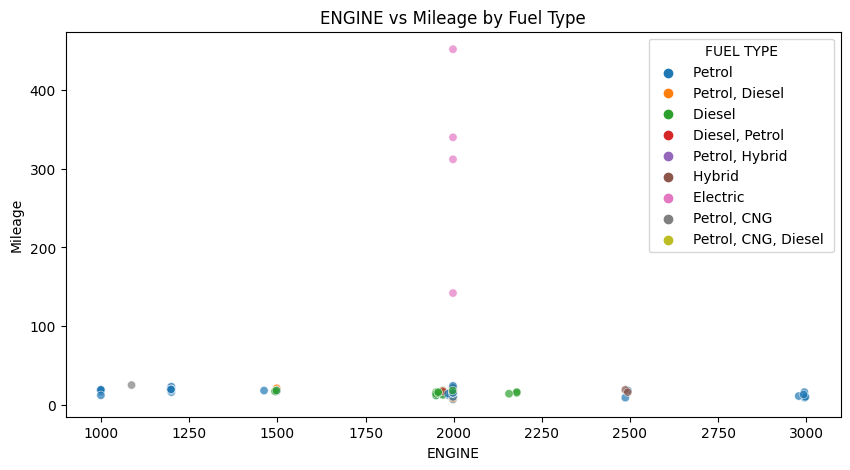

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="ENGINE", y="Mileage", hue="FUEL TYPE", data=df, alpha=0.7)
plt.title("ENGINE vs Mileage by Fuel Type")
plt.show()



## <span style="color:#8E44AD; font-size:30px;">💡 Insight</span>

<span style="color:#F1C40F;">✔️ See how bigger engines affect fuel efficiency.</span>

<span style="color:#F1C40F; font-size:28px;">→ Price vs Mileage</span>

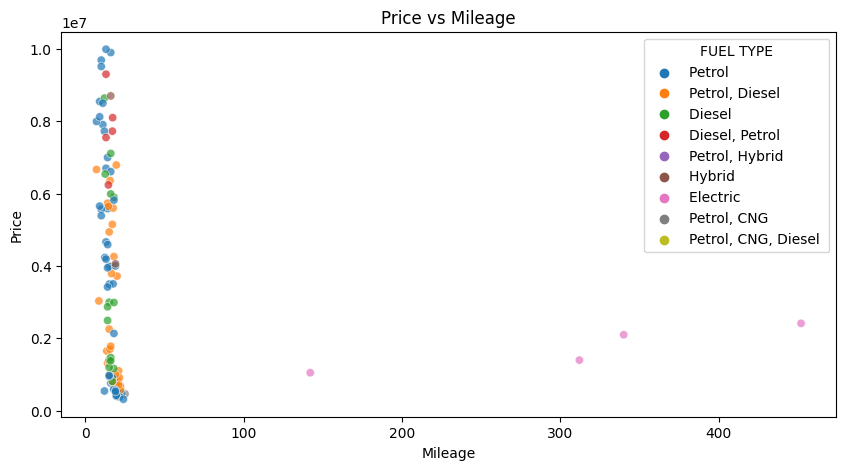

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Mileage", y="Price", data=df, hue="FUEL TYPE", alpha=0.7)
plt.title("Price vs Mileage")
plt.show()


<span style="color:#F1C40F; font-size:28px;">→ Top 10 Most Expensive Cars</span>

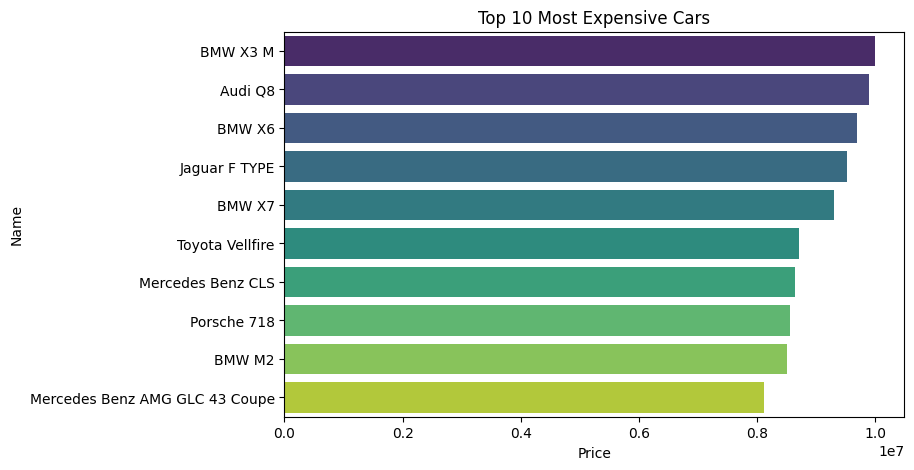

In [36]:
top10 = df.nlargest(10, "Price")[["Name", "Price"]]
plt.figure(figsize=(8,5))
sns.barplot(x="Price", y="Name", data=top10, palette="viridis")
plt.title("Top 10 Most Expensive Cars")
plt.show()


## <span style="color:#FF6B00; font-size:30px;">💡 Summary Insights</span>

<span style="color:#F1C40F;">✔️ Petrol cars dominate the market.</span>  
<span style="color:#F1C40F;">✔️ SUV and Sedan categories have higher price variance.</span>  
<span style="color:#F1C40F;">✔️ Mileage shows a mild negative correlation with price.</span>  
<span style="color:#F1C40F;">✔️ Toyota and Maruti brands balance price and fuel efficiency effectively.</span>


## <span style="color:#FF6B00; font-size:30px;">📊 Final Visualization Highlights</span>

<div style="background-color:#8E44AD; border-radius:10px; padding:15px;">
<span style="color:#FFFFFF;">
    
- Boxplots for price and mileage distribution

- Bar charts for top car brands by average price
  
- Heatmap showing correlation between numeric features  
</span>
</div>

## <span style="color:#FF6B00; font-size:30px;">Recommendations</span>
### 🔧 For Manufacturers:

Focus R&D on fuel-efficient petrol and hybrid engines — aligns with demand for affordability and performance.

Introduce automatic variants in mid-range cars; consumer preference is shifting.

Invest in EV development and charging infrastructure to capture the emerging eco-segment.

### 🛒 For Consumers:

Petrol cars offer the best balance of price, maintenance, and mileage for everyday users.

Diesel cars remain ideal for long-distance travelers seeking mileage advantage.

EVs are future-proof choices with minimal running cost but require initial investment.

### 📉 For Data Analysts / Modelers:

Engine size, fuel type, and transmission are the most predictive features for car price.

The dataset is suitable for regression modeling (predicting price or mileage).

After feature engineering, models like Linear Regression, Random Forest, or XGBoost can perform well.

<HR/>


## <span style="color:#FF6B00; font-size:30px;">🏁 Conclusion</span>
<span style="color:#FFFFFF;">
The analysis highlights how fuel type, brand, and mileage shape the pricing trends in the Indian car market.  
These insights can guide both consumers and manufacturers in making informed decisions.
</span>


 ## <span style="color:#FF6B00; font-size:30px;">🏁 Final Summary</span>
<span style="color:#FFFFFF;">

| Aspect               | Key Takeaway                              |
| -------------------- | ----------------------------------------- |
| Market Segment       | Mostly budget & mid-range cars            |
| Key Drivers of Price | Engine, Transmission, Fuel Type           |
| Market Shift         | Toward automatic and EV vehicles          |
| Data Quality         | Cleaned and ready for modeling            |
| Project Outcome      | Complete EDA + insights + recommendations |

</span>



<div style="text-align:center; background:linear-gradient(90deg,#FF6B00,#8E44AD); padding:15px; border-radius:12px;">
<span style="color:#FFFFFF; font-size:20px;">Thank You ✨</span><br>
    <p style="color:#F1C40F; text-align:center; "> "We appreciate your time reviewing this analysis".</p>
<span style="color:#F1C40F;">“Data speaks louder than assumptions.”</span>
</div>
<p style="text-align:center; color:gray; font-size:14px; margin-top:10px;">
  Indian Car Dataset Analysis | 2025
</p>